# DECISION TREE

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [5]:
# 1. Data Preparation
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\machine l\heart_disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [7]:
# 2. Exploratory Data Analysis (EDA)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [9]:
print(data.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [11]:
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


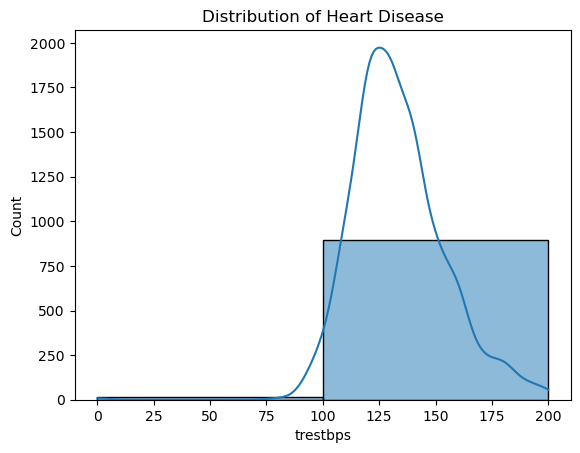

In [15]:
# Visualizations
sns.histplot(data['trestbps'], bins=2, kde=True)
plt.title('Distribution of Heart Disease')
plt.show()

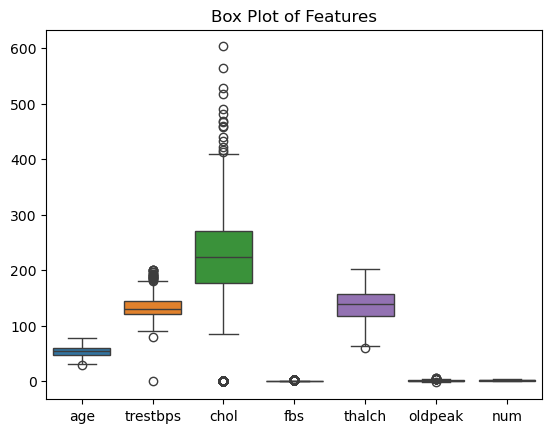

In [17]:
sns.boxplot(data=data)
plt.title('Box Plot of Features')
plt.show()

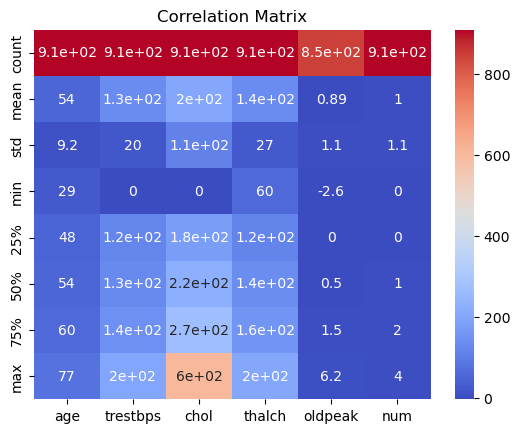

In [23]:
correlation_matrix = data.describe()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
# 3. Feature Engineering
data = pd.get_dummies(data, drop_first=True)
X = data.drop('trestbps', axis=1)
y = data['trestbps']

In [27]:
# 4. Decision Tree Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          80       0.00      0.00      0.00         0
          90       0.00      0.00      0.00         0
          94       0.00      0.00      0.00         0
          95       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         3
         101       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         0
         105       0.00      0.00      0.00         1
         107       0.00      0.00      0.00         0
         108       0.00      0.00      0.00         4
         110       0.12      0.12      0.12        17
         112       0.00      0.00      0.00         2
         113       0.00      0.00      0.00         1
         115       0.50      0.50      0.50         2
         116       0.00      0.00      0.00         0
         118       0.00      0.00      0.00         3
         120       0.26      0.32      0.29        25
         122       0.00    

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\s

In [33]:
# 5. Hyperparameter Tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}


In [35]:
# 6. Model Evaluation and Analysis
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))

              precision    recall  f1-score   support

          95       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         3
         101       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         0
         105       0.00      0.00      0.00         1
         107       0.00      0.00      0.00         0
         108       0.00      0.00      0.00         4
         110       0.25      0.06      0.10        17
         112       0.00      0.00      0.00         2
         113       0.00      0.00      0.00         1
         115       0.00      0.00      0.00         2
         118       0.00      0.00      0.00         3
         120       0.17      0.60      0.27        25
         122       0.00      0.00      0.00         2
         124       0.00      0.00      0.00         3
         125       0.00      0.00      0.00         7
         126       0.00      0.00      0.00         1
         128       0.00    

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\s

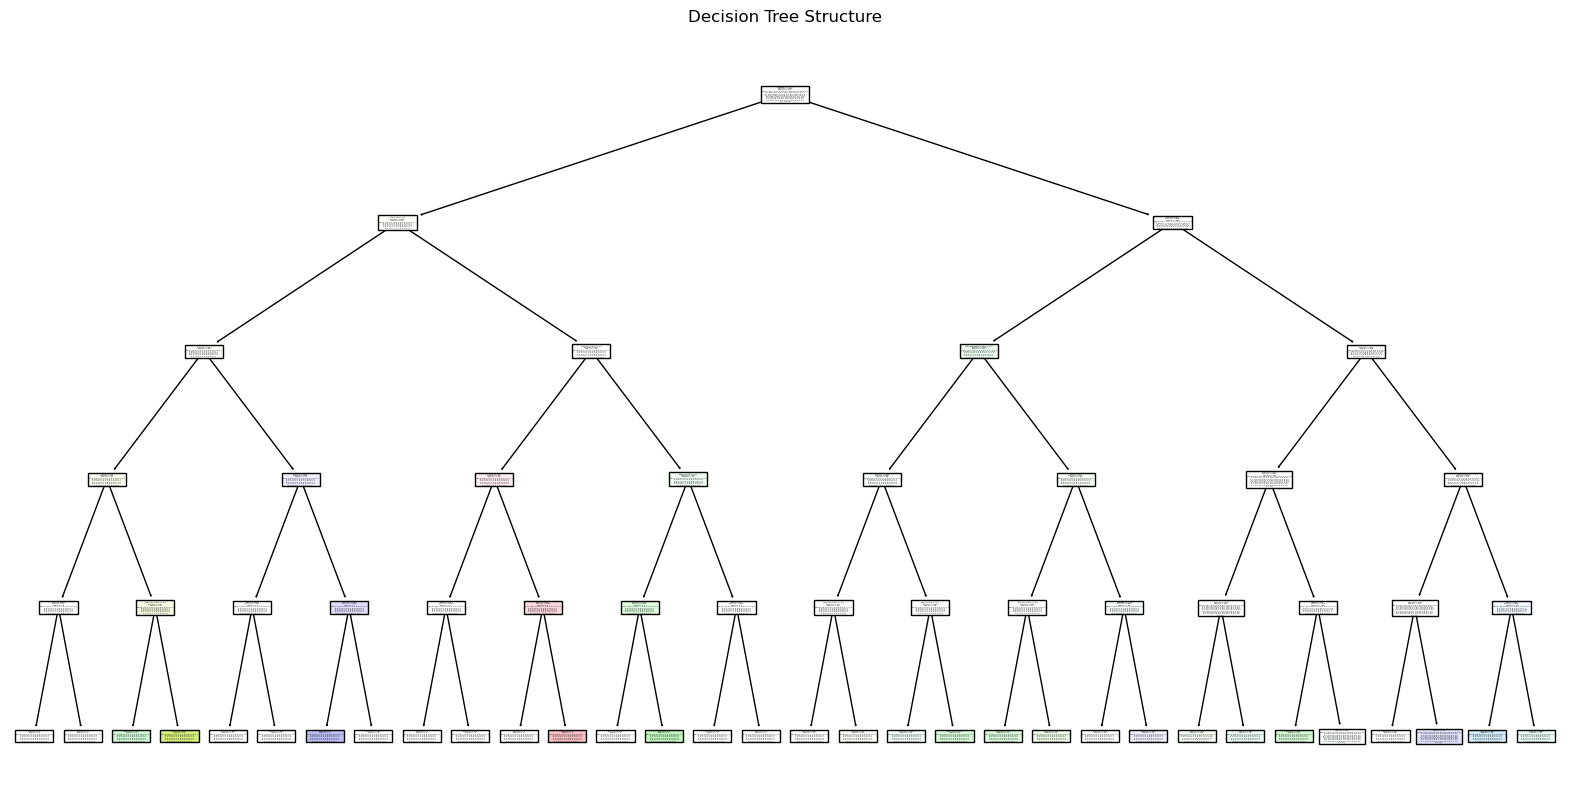

In [37]:
# Visualizing the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns)
plt.title('Decision Tree Structure')
plt.show()

# Interview Questions:

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Max Depth:

Effect: Controls the maximum depth of the tree. Shallower trees tend to have lower variance but higher bias, which can help avoid overfitting. Deeper trees can model more complex patterns but may overfit.

Min Samples Split:

Effect: The minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns to the training data, reducing overfitting.

Min Samples Leaf:

Effect: The minimum number of samples required to be at a leaf node. Increasing this parameter can smooth the model by making the leaves contain more samples, helping to reduce overfitting.

Max Features:

Effect: The number of features to consider when looking for the best split. Reducing this parameter can lead to a less complex model with lower variance, but might increase bias.

Criterion:

Effect: The function to measure the quality of a split. Common criteria include "gini" for the Gini impurity and "entropy" for information gain. Different criteria can lead to different tree structures and, consequently, different performance.

Max Leaf Nodes:

Effect: Limits the number of leaf nodes in the tree. By restricting the number of leaf nodes, the model complexity is reduced, which helps in avoiding overfitting.

## 2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding:

Process: Assigns an integer value to each unique category. For example, Red = 0, Green = 1, and Blue = 2.

Pros: Simple and retains ordinal relationships between categories (if any).

Cons: Implies an ordinal relationship which may not exist, causing the model to interpret Red < Green < Blue.

One-Hot Encoding:

Process: Converts each category into separate binary columns. For example, categories Red, Green, and Blue become three new columns with binary values indicating the presence of each category.

Pros: Avoids the ordinal relationship issue, suitable for nominal data.

Cons: Increases dimensionality, potentially leading to the curse of dimensionality with many unique categories.